## **DATA CLEANING**

In [2]:
import pandas as pd
import numpy as np
import re
import html
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
import string
from string import punctuation
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
df_ce = pd.read_csv("Canadian_elections_2019.csv")
df_s = pd.read_csv("Sentiment.csv")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


######**Checking missing values in Canadian_elections.csv**

In [3]:
# make sure that there is no missing value in negative sentiment, since it is reasonable to have missing values in positive sentiment.
df_ce_neg = df_ce[df_ce['sentiment']=='Negative']
df_ce_neg.apply(lambda x: sum(x.isnull().values), axis = 0)


sentiment          0
negative_reason    0
text               0
dtype: int64

In [4]:
# Missing values of positive sentiment only exist in negative_reason, which is reasonable.
df_ce_neg = df_ce[df_ce['sentiment']=='Positive']
df_ce_neg.apply(lambda x: sum(x.isnull().values), axis = 0)

sentiment             0
negative_reason    1126
text                  0
dtype: int64

###### **In conclusion, there is No missing value.**

######**Checking missing values in Sentiment.csv**

In [5]:
for i in range(len(df_s.columns)):
      if 100*(df_s[df_s.columns[i]].isna().sum()/len(df_s[df_s.columns[i]])) > 0:
          print(df_s.columns[i], "has", 100*df_s[df_s.columns[i]].isna().sum()/len(df_s[df_s.columns[i]]), "percents of missinng values")

df_s = df_s.dropna(subset=['text']) # drop the rows with missing values.
df_s

text has 0.010462518029160532 percents of missinng values


,sentiment,text
0,Positive,RT @Diplomtc_Immnty: @realDonaldTrump They tri...
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the ..."
2,Positive,I'm listening The Beatles now. They're great
3,Positive,@ddlovato could i please get a shout out or an...
4,Positive,@salspizza just spotted ur message there Tony ...
...,...,...
133806,Positive,"@scottw Nice, I have the 20/20 but to be hones..."
133807,Positive,â€œ@BW_React: #GOPDebate verdict: @JohnKasich ...
133808,Negative,@amtrack i am sorry .... i love you tho and t...
133809,Positive,@RazorTV http://tinyurl.com/d96txo - Champions...


###### **choosing subset of data, since it took long time to run the original data and finally carsh. Original data was too huge.**

In [6]:
df_s = df_s.iloc[:10000,:]
df_s

,sentiment,text
0,Positive,RT @Diplomtc_Immnty: @realDonaldTrump They tri...
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the ..."
2,Positive,I'm listening The Beatles now. They're great
3,Positive,@ddlovato could i please get a shout out or an...
4,Positive,@salspizza just spotted ur message there Tony ...
...,...,...
9996,Negative,RT @RWSurferGirl: Jeb Bush reminds me of eleva...
9997,Positive,@GilkisonT and it's not just cause your ba wa ...
9998,Negative,@OffTheHook77 You guys are gonna make me cry
9999,Negative,cant sleep. im sick too


In [0]:
df_ce_v = df_ce.values
df_s_v = df_s.values

In [8]:
df_s_v

array([['Positive',
        'RT @Diplomtc_Immnty: @realDonaldTrump They tried to take you out &amp; your poll numbers skyrocketed. Voters matter, not @FOXNews moderators.\n#â€¦'],
       ['Negative',
        "@chiefy74 Damn i'm jealous, i wanna watch the fight  i love ufc just no one knows."],
       ['Positive', "I'm listening The Beatles now. They're great "],
       ...,
       ['Negative', '@OffTheHook77 You guys are gonna make me cry '],
       ['Negative', 'cant sleep. im sick too '],
       ['Positive',
        'RT @UniteWomenOrg: #CarlyFiorina is perfect GOP candidate. Great performance at #GOPDebate with 0% truth rating via @PolitiFact']],
      dtype=object)

## **1.Data cleaning**

In [0]:
for i in range(df_s_v.shape[0]):
    cleanr = re.compile('<.*?>')
    df_s_v[i,1] = re.sub(cleanr, '', df_s_v[i,1]) # All html tags and attributes (i.e., /<[^>]+>/) are removed

    df_s_v[i,1] = html.unescape(df_s_v[i,1]) # Html character codes (i.e., &...;) are replaced with an ASCII equivalent.

    df_s_v[i,1] = re.sub('http[s]?://\S+', '', df_s_v[i,1]) # All URLs are removed.

    df_s_v[i,1] = df_s_v[i,1].lower() # Convert to lower case.

    df_s_v[i,1] = "".join([k for k in df_s_v[i,1] if k not in string.punctuation]) # Remove punctuation.

    tokenizer = RegexpTokenizer(r'\w+')         
    df_s_v[i,1] = tokenizer.tokenize(df_s_v[i,1])

    words_rmStop0 = [word for word in df_s_v[i,1] if word not in stopwords.words('english')] # All stop words are removed

    ps = PorterStemmer()
    df_s_v[i,1] = [ps.stem(word) for word in words_rmStop0] # stem words


In [10]:
df_ce_v

array([['Negative', 'Women Reproductive right and Racism',
        'b"@RosieBarton So instead of your suggestion, how about we agree that #Canadian #women can not and should not trust that #AndrewScheer and a #Conservatives government will protect a woman\'s right to have automony over her body. Let\'s go with that.  #cdnpoli #elxn43  #Canada #abortion"'],
       ['Positive', nan,
        'b"#AllWomanSpacewalk it\'s real!\\n@Space_Station \\n#EtobicokeNorth #CityofTO #ONPoli #cdnpoli #elxn43 https://t.co/wgdXLksTbQ"'],
       ['Negative', 'Economy',
        'b"#Brantford It\'s going to cost YOU $94 BILLION FOR THE NEXT 4 YEARS! ASK JUSTIN! #elxn43 #cdnpoli #Canada https://t.co/9DTLLd9972"'],
       ...,
       ['Positive', nan,
        "b'Your daily reminder:\\n@theJagmeetSingh endorses strategic voting\\n#elxn43 #elxn2019 #CDNpoli #LPC #NDP #GPC https://t.co/DcnC7PWM6g'"],
       ['Negative', 'Women Reproductive right and Racism',
        "b'Yup...not going to reopen the abortion deba

In [0]:
for i in range(df_ce_v.shape[0]):
    # for j in [0,2]:
    cleanr = re.compile('<.*?>')
    df_ce_v[i,2] = re.sub(cleanr, '', df_ce_v[i,2]) # All html tags and attributes (i.e., /<[^>]+>/) are removed

    df_ce_v[i,2] = html.unescape(df_ce_v[i,2]) # Html character codes (i.e., &...;) are replaced with an ASCII equivalent.

    df_ce_v[i,2] = re.sub('http[s]?://\S+', '', df_ce_v[i,2]) # All URLs are removed.

    df_ce_v[i,2] = df_ce_v[i,2].lower() # Convert to lower case.

    df_ce_v[i,2] = "".join(k for k in df_ce_v[i,2] if k not in string.punctuation) # Remove punctuation.

    tokenizer = RegexpTokenizer(r'\w+')         
    df_ce_v[i,2] = tokenizer.tokenize(df_ce_v[i,2]) # All stop words are removed.

    words_rmStop0 = [word for word in df_ce_v[i,2] if word not in stopwords.words('english')] # stem words
    df_ce_v[i,2][0] = df_ce_v[i,2][0][1:]



In [12]:
df_ce_v

array([['Negative', 'Women Reproductive right and Racism',
        list(['rosiebarton', 'so', 'instead', 'of', 'your', 'suggestion', 'how', 'about', 'we', 'agree', 'that', 'canadian', 'women', 'can', 'not', 'and', 'should', 'not', 'trust', 'that', 'andrewscheer', 'and', 'a', 'conservatives', 'government', 'will', 'protect', 'a', 'womans', 'right', 'to', 'have', 'automony', 'over', 'her', 'body', 'lets', 'go', 'with', 'that', 'cdnpoli', 'elxn43', 'canada', 'abortion'])],
       ['Positive', nan,
        list(['allwomanspacewalk', 'its', 'realnspacestation', 'netobicokenorth', 'cityofto', 'onpoli', 'cdnpoli', 'elxn43'])],
       ['Negative', 'Economy',
        list(['brantford', 'its', 'going', 'to', 'cost', 'you', '94', 'billion', 'for', 'the', 'next', '4', 'years', 'ask', 'justin', 'elxn43', 'cdnpoli', 'canada'])],
       ...,
       ['Positive', nan,
        list(['your', 'daily', 'remindernthejagmeetsingh', 'endorses', 'strategic', 'votingnelxn43', 'elxn2019', 'cdnpoli', 'lpc', 'ndp'

## **2.Exploratory analysis**

In [0]:
# Key words in each party to find out which tweet belongs to which party.
Liberal =['trudeau', 'justin', 'liberal', 'sheilacopps', 'lpc', 'red', 'chretien']
Conservative=['scheer','andrew', 'conservative', 'blue', 'cpc', 'poilievre', 'stephen', 'harper', 'scheerlies']
NDP=['ndp', 'orange', 'jagmeet', 'Blanchet', 'mulcair', 'singh']
P = []

In [0]:
def party(x):
    L = 0
    C = 0
    ND = 0
    # check the fraquency of key word from each party in each tweet.
    for w in Liberal:
        if w in x:
            L += 1
    for w in Conservative:
        if w in x:
            C += 1
    for w in NDP:
        if w in x:
            ND += 1
    if (L > C) and (L > ND):
        return 'L'
    elif (C > L) and (C > ND):
        return 'C'
    elif (ND > L) and (ND > C):
        return 'ND'


    
    

In [15]:
df_ce_v.shape

(2133, 3)

In [0]:
for i in df_ce_v[:, -1]:
    P1 = []
    # each tweet belongs to party with the highest key word frequency among 3 party, if key word frequency of all 3 party are 0, it belongs to None.
    for j in i:
        x = party(j)
        P1.append(x)
    if (P1.count('L') > P1.count('C')) and (P1.count('L') > P1.count('ND')):
        P.append('Liberal')
    elif (P1.count('C') > P1.count('L')) and (P1.count('C') > P1.count('ND')):
        P.append('Conservative')
    elif (P1.count('ND') > P1.count('C')) and (P1.count('ND') > P1.count('L')):
        P.append('NDP')
    else:
        P.append('None')



In [17]:
print(P)

['Conservative', 'None', 'Liberal', 'None', 'Liberal', 'Conservative', 'None', 'None', 'None', 'None', 'None', 'Liberal', 'None', 'None', 'None', 'Conservative', 'None', 'NDP', 'None', 'Conservative', 'Liberal', 'Conservative', 'None', 'Liberal', 'Liberal', 'None', 'Liberal', 'Liberal', 'Liberal', 'None', 'Liberal', 'None', 'Conservative', 'None', 'Conservative', 'Conservative', 'Liberal', 'Liberal', 'None', 'Conservative', 'Liberal', 'Conservative', 'None', 'Conservative', 'Conservative', 'Liberal', 'Conservative', 'None', 'Liberal', 'Liberal', 'None', 'Liberal', 'Conservative', 'None', 'Liberal', 'None', 'Liberal', 'None', 'None', 'Conservative', 'Conservative', 'None', 'None', 'None', 'None', 'Liberal', 'Liberal', 'Liberal', 'Liberal', 'None', 'None', 'NDP', 'Conservative', 'None', 'Conservative', 'Conservative', 'None', 'Conservative', 'None', 'None', 'Conservative', 'None', 'Conservative', 'Conservative', 'Conservative', 'Conservative', 'None', 'None', 'None', 'Conservative', 'Lib

In [18]:
max([P.count('Liberal'), P.count('Conservative'), P.count('NDP')])

523

In [19]:
df_party = pd.DataFrame({'freq':P})
df_party

,freq
0,Conservative
1,None
2,Liberal
3,None
4,Liberal
...,...
2128,Conservative
2129,None
2130,NDP
2131,Conservative


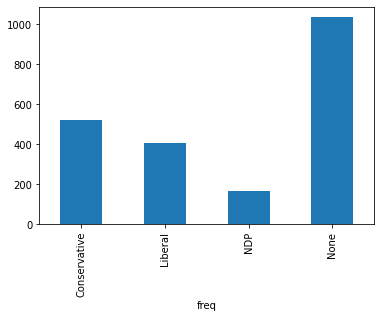

In [20]:
df_party.groupby('freq').size().plot(kind='bar')

###### **Most of the tweets are hard to identify to certain political party. Besides that, Conservative party got the highest numebr of tweets. Liberal is the second and NDP is the last one .**

In [0]:
# for i in range(df_ce_v.shape[0]):
#     ps = PorterStemmer()
#     df_ce_v[i,2] = [ps.stem(word) for word in words_rmStop0]

In [22]:
df_ce_v

array([['Negative', 'Women Reproductive right and Racism',
        list(['rosiebarton', 'so', 'instead', 'of', 'your', 'suggestion', 'how', 'about', 'we', 'agree', 'that', 'canadian', 'women', 'can', 'not', 'and', 'should', 'not', 'trust', 'that', 'andrewscheer', 'and', 'a', 'conservatives', 'government', 'will', 'protect', 'a', 'womans', 'right', 'to', 'have', 'automony', 'over', 'her', 'body', 'lets', 'go', 'with', 'that', 'cdnpoli', 'elxn43', 'canada', 'abortion'])],
       ['Positive', nan,
        list(['allwomanspacewalk', 'its', 'realnspacestation', 'netobicokenorth', 'cityofto', 'onpoli', 'cdnpoli', 'elxn43'])],
       ['Negative', 'Economy',
        list(['brantford', 'its', 'going', 'to', 'cost', 'you', '94', 'billion', 'for', 'the', 'next', '4', 'years', 'ask', 'justin', 'elxn43', 'cdnpoli', 'canada'])],
       ...,
       ['Positive', nan,
        list(['your', 'daily', 'remindernthejagmeetsingh', 'endorses', 'strategic', 'votingnelxn43', 'elxn2019', 'cdnpoli', 'lpc', 'ndp'

In [23]:
# join the list of words to be a sentence in each tweet of Sentiment.csv
for i in range(df_s_v.shape[0]):
    df_s_v[i, 1] = " ".join(df_s_v[i, 1])
df_s_v

array([['Positive',
        'rt diplomtcimmnti realdonaldtrump tri take poll number skyrocket voter matter foxnew moder â'],
       ['Negative',
        'chiefy74 damn im jealou wanna watch fight love ufc one know'],
       ['Positive', 'im listen beatl theyr great'],
       ...,
       ['Negative', 'offthehook77 guy gonna make cri'],
       ['Negative', 'cant sleep im sick'],
       ['Positive',
        'rt unitewomenorg carlyfiorina perfect gop candid great perform gopdeb 0 truth rate via politifact']],
      dtype=object)

In [24]:
# join the list of words to be a sentence in each tweet of Canadian elections.csv
for i in range(df_ce_v.shape[0]):
    df_ce_v[i, 2] = " ".join(df_ce_v[i, 2])
df_ce_v

array([['Negative', 'Women Reproductive right and Racism',
        'rosiebarton so instead of your suggestion how about we agree that canadian women can not and should not trust that andrewscheer and a conservatives government will protect a womans right to have automony over her body lets go with that cdnpoli elxn43 canada abortion'],
       ['Positive', nan,
        'allwomanspacewalk its realnspacestation netobicokenorth cityofto onpoli cdnpoli elxn43'],
       ['Negative', 'Economy',
        'brantford its going to cost you 94 billion for the next 4 years ask justin elxn43 cdnpoli canada'],
       ...,
       ['Positive', nan,
        'your daily remindernthejagmeetsingh endorses strategic votingnelxn43 elxn2019 cdnpoli lpc ndp gpc'],
       ['Negative', 'Women Reproductive right and Racism',
        'yupnot going to reopen the abortion debatexf0x9fx98x8fnelxn43 scheerlies scheerhypocrisy'],
       ['Positive', nan, 'zingnndp elxn43']], dtype=object)

In [25]:
df_s = pd.DataFrame(data = df_s_v, columns=['sentiment', 'text']) # convert to dataframe
df_s

,sentiment,text
0,Positive,rt diplomtcimmnti realdonaldtrump tri take pol...
1,Negative,chiefy74 damn im jealou wanna watch fight love...
2,Positive,im listen beatl theyr great
3,Positive,ddlovato could pleas get shout anyth im huge f...
4,Positive,salspizza spot ur messag toni repli
...,...,...
9995,Negative,rt rwsurfergirl jeb bush remind elev music hea...
9996,Positive,gilkisont caus ba wa chicka wa waa factor even...
9997,Negative,offthehook77 guy gonna make cri
9998,Negative,cant sleep im sick


In [26]:
df_ce = pd.DataFrame(data = df_ce_v, columns=['sentiment', 'negative_reason', 'text']) # convert to dataframe
df_ce

,sentiment,negative_reason,text
0,Negative,Women Reproductive right and Racism,rosiebarton so instead of your suggestion how ...
1,Positive,NaN,allwomanspacewalk its realnspacestation netobi...
2,Negative,Economy,brantford its going to cost you 94 billion for...
3,Positive,NaN,canada canadaelection2019 canadavotes nelxn43 ...
4,Negative,Economy,canada taxpayers are sick tired of having thei...
...,...,...,...
2128,Negative,Scandal,you know he was doing a good enough job smeari...
2129,Negative,Scandal,you missed the comment deflecting the issue do...
2130,Positive,NaN,your daily remindernthejagmeetsingh endorses s...
2131,Negative,Women Reproductive right and Racism,yupnot going to reopen the abortion debatexf0x...


In [27]:
df_s['sentiment_value'] = df_s['sentiment'].apply(lambda x: 1 if x == 'Positive' else 0) # add a new column that apply 1 to positive sentiment and 0 to negative sentiment.
df_s['text_length'] = df_s['text'].apply(len) # add a new column that contain the length of text corresponding to each tweets.
df_s

,sentiment,text,sentiment_value,text_length
0,Positive,rt diplomtcimmnti realdonaldtrump tri take pol...,1,92
1,Negative,chiefy74 damn im jealou wanna watch fight love...,0,59
2,Positive,im listen beatl theyr great,1,27
3,Positive,ddlovato could pleas get shout anyth im huge f...,1,65
4,Positive,salspizza spot ur messag toni repli,1,35
...,...,...,...,...
9995,Negative,rt rwsurfergirl jeb bush remind elev music hea...,0,80
9996,Positive,gilkisont caus ba wa chicka wa waa factor even...,1,58
9997,Negative,offthehook77 guy gonna make cri,0,31
9998,Negative,cant sleep im sick,0,18


In [28]:
df_ce['sentiment_value'] = df_ce['sentiment'].apply(lambda x: 1 if x == 'Positive' else 0) # add a new column that apply 1 to positive sentiment and 0 to negative sentiment.
df_ce['text_length'] = df_ce['text'].apply(len) # add a new column that contain the length of text corresponding to each tweets.
df_ce

,sentiment,negative_reason,text,sentiment_value,text_length
0,Negative,Women Reproductive right and Racism,rosiebarton so instead of your suggestion how ...,0,266
1,Positive,NaN,allwomanspacewalk its realnspacestation netobi...,1,86
2,Negative,Economy,brantford its going to cost you 94 billion for...,0,96
3,Positive,NaN,canada canadaelection2019 canadavotes nelxn43 ...,1,78
4,Negative,Economy,canada taxpayers are sick tired of having thei...,0,259
...,...,...,...,...,...
2128,Negative,Scandal,you know he was doing a good enough job smeari...,0,205
2129,Negative,Scandal,you missed the comment deflecting the issue do...,0,244
2130,Positive,NaN,your daily remindernthejagmeetsingh endorses s...,1,97
2131,Negative,Women Reproductive right and Racism,yupnot going to reopen the abortion debatexf0x...,0,88


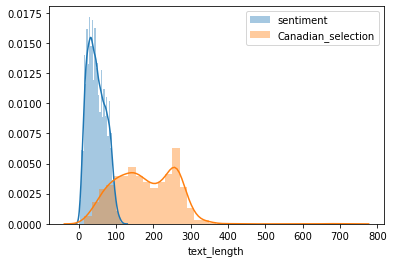

In [29]:
sns.distplot(df_s['text_length'], label='sentiment')
sns.distplot(df_ce['text_length'], label = 'Canadian_selection')
plt.legend()

Text(0.5, 1.0, 'sentiment')

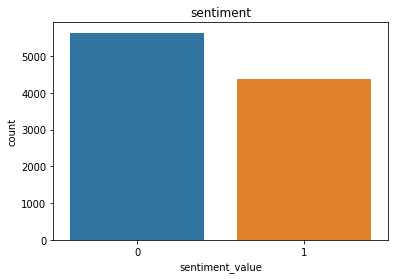

In [30]:
sns.countplot(df_s['sentiment_value'])
plt.title("sentiment")

Text(0.5, 1.0, 'canadian_selection')

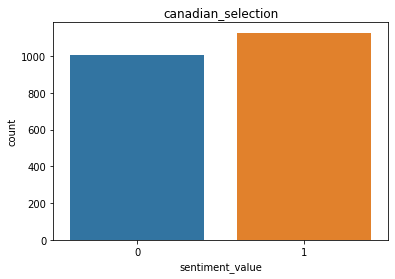

In [31]:
sns.countplot(df_ce['sentiment_value'])
plt.title("canadian_selection")

## **3.MODEL PREPARATION**

In [0]:
x_s = df_s.iloc[:, 1].values
y_s = df_s.iloc[:, 2].values

In [0]:
vectorizer = CountVectorizer()
x_s_WF = vectorizer.fit_transform(x_s) # vectorize to word frequency (WF)
vectorizer3 = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None)
x_s_TFIDF = vectorizer3.fit_transform(x_s) # vectorize to TF-IDF
x_s_WF_tra, x_s_WF_test, y_s_WF_tra, y_s_WF_test = train_test_split(x_s_WF, y_s, test_size = 0.3, random_state=42) # split data into 70% of training data and 30% of test data
x_s_TFIDF_tra, x_s_TFIDF_test, y_s_TFIDF_tra, y_s_TFIDF_test = train_test_split(x_s_TFIDF, y_s, test_size = 0.3, random_state=42)

## **4.MODLE IMPLEMENTATION**

###### **logistic regression with feature TFIDF**

In [34]:
lr = LogisticRegression(max_iter=5000)
scores = cross_val_score(lr, x_s_TFIDF_tra, y_s_TFIDF_tra, cv=5, scoring='accuracy') # 5 fold cross validation of Logistic Regression model
print(scores.mean())

0.6987142857142856


In [35]:
# Hyperparameters Tunning of Logistic Regression model to find out the best hyperparameters corresponding to the best accuracy.
C = [0.001, 0.005, 0.01, 0.05, 0.1, 1, 10]
solver = ['liblinear', 'saga', 'newton-cg', 'lbfgs','saga']
param_grid = dict(C=C,
                  solver=solver)
grid = GridSearchCV(estimator=lr,
                    param_grid=param_grid,
                    scoring='accuracy',
                    verbose=0,
                    n_jobs=-1,
                    cv=5)
grid_result = grid.fit(x_s_TFIDF_tra, y_s_TFIDF_tra)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.7328571428571429
Best Params:  {'C': 0.005, 'solver': 'saga'}


In [36]:
# Using the best hyperparameters to predict test data.
C = 0.01
solver = 'saga'
lr = LogisticRegression(max_iter=5000, C=C, solver=solver)
clf_lr = lr.fit(x_s_TFIDF_tra, y_s_TFIDF_tra)
y_pred = clf_lr.predict(x_s_TFIDF_test)
print ("Logistic regression model's accuracy on test set with optimal hyperparameters is: {}%".format(round(100 * np.mean(y_pred == y_s_TFIDF_test),3)))

Logistic regression model's accuracy on test set with optimal hyperparameters is: 72.867%


###### **logistic regression with feature WF**

In [37]:
lr = LogisticRegression(max_iter=5000)
scores = cross_val_score(lr, x_s_WF_tra, y_s_WF_tra, cv=5, scoring='accuracy') # 5 fold cross validation of Logistic Regression model
print(scores.mean())

0.7312857142857143


In [38]:
# Hyperparameters Tunning of Logistic Regression model to find out the best hyperparameters corresponding to the best accuracy.
C = [0.001, 0.005, 0.01, 0.05, 0.1, 1, 10]
solver = ['liblinear', 'saga', 'newton-cg', 'lbfgs','saga']
param_grid = dict(C=C,
                  solver=solver)
grid = GridSearchCV(estimator=lr,
                    param_grid=param_grid,
                    scoring='accuracy',
                    verbose=0,
                    n_jobs=-1,
                    cv=5)
grid_result = grid.fit(x_s_WF_tra, y_s_WF_tra)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.7315714285714285
Best Params:  {'C': 0.1, 'solver': 'newton-cg'}


In [39]:
# Using the best hyperparameters to predict test data.
C = 0.1
solver = 'newton-cg'
lr = LogisticRegression(max_iter=5000, C=C, solver=solver)
clf_lr = lr.fit(x_s_WF_tra, y_s_WF_tra)
y_pred = clf_lr.predict(x_s_WF_test)
print ("Logistic regression model's accuracy on test set with optimal hyperparameters is: {}%".format(round(100 * np.mean(y_pred == y_s_TFIDF_test),3)))

Logistic regression model's accuracy on test set with optimal hyperparameters is: 72.733%


###### **KNN with feature TFIDF**

In [40]:
knn = KNeighborsClassifier()
scores = cross_val_score(knn, x_s_TFIDF_tra, y_s_TFIDF_tra, cv=5, scoring='accuracy') # 5 fold cross validation of KNN model
print(scores.mean())

0.5752857142857143


In [41]:
# Hyperparameters Tunning of KNN model to find out the best hyperparameters corresponding to the best accuracy.
n_neighbors = list(range(5,10))
p=[1,2]
param_grid = dict(n_neighbors=n_neighbors,
                  p=p)
grid = GridSearchCV(estimator=knn,
                    param_grid=param_grid,
                    scoring='accuracy',
                    verbose=0,
                    n_jobs=-1,
                    cv=5)
grid_result = grid.fit(x_s_TFIDF_tra, y_s_TFIDF_tra)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best Score:  0.6258571428571428
Best Params:  {'n_neighbors': 8, 'p': 1}


In [42]:
# Using the best hyperparameters to predict test data.
n_neighbors = 8
p = 1
knn = KNeighborsClassifier(n_neighbors=n_neighbors, p=p)
clf_knn = knn.fit(x_s_TFIDF_tra, y_s_TFIDF_tra)
y_pred = clf_knn.predict(x_s_TFIDF_test)
print ("KNN model's accuracy on test set with optimal hyperparameters is: {}%".format(round(100 * np.mean(y_pred == y_s_TFIDF_test),3)))

KNN model's accuracy on test set with optimal hyperparameters is: 61.333%


###### **KNN with feature WF**

In [43]:
knn = KNeighborsClassifier()
scores = cross_val_score(knn, x_s_WF_tra, y_s_WF_tra, cv=5, scoring='accuracy') # 5 fold cross validation of KNN model
print(scores.mean())

0.6384285714285716


In [44]:
# Hyperparameters Tunning of KNN model to find out the best hyperparameters corresponding to the best accuracy.
n_neighbors = list(range(5,10))
p=[1,2]
param_grid = dict(n_neighbors=n_neighbors,
                  p=p)
grid = GridSearchCV(estimator=knn,
                    param_grid=param_grid,
                    scoring='accuracy',
                    verbose=0,
                    n_jobs=-1,
                    cv=5)
grid_result = grid.fit(x_s_WF_tra, y_s_WF_tra)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.642
Best Params:  {'n_neighbors': 6, 'p': 1}


In [45]:
# Using the best hyperparameters to predict test data.
n_neighbors = 6
p = 1
knn = KNeighborsClassifier(n_neighbors=n_neighbors, p=p)
clf_knn = knn.fit(x_s_WF_tra, y_s_WF_tra)
y_pred = clf_knn.predict(x_s_WF_test)
print ("KNN model's accuracy on test set with optimal hyperparameters is: {}%".format(round(100 * np.mean(y_pred == y_s_WF_test),3)))

KNN model's accuracy on test set with optimal hyperparameters is: 62.967%


###### **SVM with feature TFIDF**

In [46]:
svm = SVC()
scores = cross_val_score(svm, x_s_TFIDF_tra, y_s_TFIDF_tra, cv=5, scoring='accuracy') # 5 fold cross validation of SVM model
print(scores.mean())

0.7264285714285714


In [47]:
# Hyperparameters Tunning of SVM model to find out the best hyperparameters corresponding to the best accuracy.
C = [0.001, 0.01, 0.05, 0.1, 1, 10, 100]
gamma = [1,0.1,0.01,0.001, 'scale']
kernel = ['rbf', 'poly', 'sigmoid']
param_grid = dict(C=C,
                  gamma=gamma,
                  kernel=kernel)
grid = GridSearchCV(estimator=svm,
                    param_grid=param_grid,
                    scoring='accuracy',
                    verbose=0,
                    n_jobs=-1,
                    cv=5)
grid_result = grid.fit(x_s_TFIDF_tra, y_s_TFIDF_tra)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.7264285714285714
Best Params:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [48]:
# Using the best hyperparameters to predict test data.
C=1
gamma='scale'
kernel='rbf'
svm = SVC(C=C, gamma=gamma, kernel=kernel)
clf_svm = svm.fit(x_s_TFIDF_tra, y_s_TFIDF_tra)
y_pred = clf_svm.predict(x_s_TFIDF_test)
print ("SVM model's accuracy on test set with optimal hyperparameters is: {}%".format(round(100 * np.mean(y_pred == y_s_TFIDF_test),3)))

SVM model's accuracy on test set with optimal hyperparameters is: 72.3%


######**SVM with feature WF**

In [49]:
svm = SVC()
scores = cross_val_score(svm, x_s_WF_tra, y_s_WF_tra, cv=5, scoring='accuracy') # 5 fold cross validation of SVM model
print(scores.mean())

0.7344285714285715


In [50]:
# Hyperparameters Tunning of SVM model to find out the best hyperparameters corresponding to the best accuracy.
C = [0.001, 0.01, 0.05, 0.1, 1, 10, 100]
gamma = [1,0.1,0.01,0.001, 'scale']
kernel = ['rbf', 'poly', 'sigmoid']
param_grid = dict(C=C,
                  gamma=gamma,
                  kernel=kernel)
grid = GridSearchCV(estimator=svm,
                    param_grid=param_grid,
                    scoring='accuracy',
                    verbose=0,
                    n_jobs=-1,
                    cv=5)
grid_result = grid.fit(x_s_WF_tra, y_s_WF_tra)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.735857142857143
Best Params:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [51]:
# Using the best hyperparameters to predict test data.
C=1
gamma=0.1
kernel='rbf'
svm = SVC(C=C, gamma=gamma, kernel=kernel)
clf_svm = svm.fit(x_s_WF_tra, y_s_WF_tra)
y_pred = clf_svm.predict(x_s_WF_test)
print ("SVM model's accuracy on test set with optimal hyperparameters is: {}%".format(round(100 * np.mean(y_pred == y_s_WF_test),3)))

SVM model's accuracy on test set with optimal hyperparameters is: 72.9%


###### **Decision Tree with feature TFIDF**

In [52]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, x_s_TFIDF_tra, y_s_TFIDF_tra, cv=5, scoring='accuracy') # 5 fold cross validation of Decision Tree model
print(scores.mean())

0.6945714285714286


In [53]:
# Hyperparameters Tunning of Decision Tree model to find out the best hyperparameters corresponding to the best accuracy.
criterion = ['gini', 'entropy']
max_depth = [100,200,500,700,1000,1500]
param_grid = dict(criterion=criterion,
                  max_depth=max_depth)
grid = GridSearchCV(estimator=dt,
                    param_grid=param_grid,
                    scoring='accuracy',
                    verbose=0,
                    n_jobs=-1,
                    cv=5)
grid_result = grid.fit(x_s_TFIDF_tra, y_s_TFIDF_tra)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.7001428571428571
Best Params:  {'criterion': 'entropy', 'max_depth': 500}


In [54]:
# Using the best hyperparameters to predict test data.
criterion = 'entropy'
max_depth = 500
dt = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
clf_dt = dt.fit(x_s_TFIDF_tra, y_s_TFIDF_tra)
y_pred = clf_dt.predict(x_s_TFIDF_test)
print ("Decision Tree model's accuracy on test set with optimal hyperparameters is: {}%".format(round(100 * np.mean(y_pred == y_s_TFIDF_test),3)))

Decision Tree model's accuracy on test set with optimal hyperparameters is: 67.767%


######**Decision Tree with feature WF**

In [55]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, x_s_WF_tra, y_s_WF_tra, cv=5, scoring='accuracy') # 5 fold cross validation of Decision Tree model
print(scores.mean())

0.6942857142857142


In [56]:
# Hyperparameters Tunning of Decision Tree model to find out the best hyperparameters corresponding to the best accuracy.
criterion = ['gini', 'entropy']
max_depth = [100,200,500,700,1000,1500]
param_grid = dict(criterion=criterion,
                  max_depth=max_depth)
grid = GridSearchCV(estimator=dt,
                    param_grid=param_grid,
                    scoring='accuracy',
                    verbose=0,
                    n_jobs=-1,
                    cv=5)
grid_result = grid.fit(x_s_WF_tra, y_s_WF_tra)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.6955714285714285
Best Params:  {'criterion': 'gini', 'max_depth': 700}


In [57]:
# Using the best hyperparameters to predict test data.
criterion = 'gini'
max_depth = 500
dt = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
clf_dt = dt.fit(x_s_WF_tra, y_s_WF_tra)
y_pred = clf_dt.predict(x_s_WF_test)
print ("Decision Tree model's accuracy on test set with optimal hyperparameters is: {}%".format(round(100 * np.mean(y_pred == y_s_WF_test),3)))

Decision Tree model's accuracy on test set with optimal hyperparameters is: 68.4%


###### **Random Forest with feature TFIDF**

In [58]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, x_s_TFIDF_tra, y_s_TFIDF_tra, cv=5, scoring='accuracy') # 5 fold cross validation of Random Forest model
print(scores.mean())

0.7225714285714285


In [59]:
# Hyperparameters Tunning of Random Forest model to find out the best hyperparameters corresponding to the best accuracy.
max_depth = [100,200,500,700,1000,1500]
n_estimators = [50, 100, 150, 200]
param_grid = dict(max_depth=max_depth,
                  n_estimators=n_estimators)
grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    scoring='accuracy',
                    verbose=0,
                    n_jobs=-1,
                    cv=5)
grid_result = grid.fit(x_s_TFIDF_tra, y_s_TFIDF_tra)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.7285714285714285
Best Params:  {'max_depth': 200, 'n_estimators': 200}


In [60]:
# Using the best hyperparameters to predict test data.
n_estimators = 200
max_depth = 500
rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
clf_rf = rf.fit(x_s_TFIDF_tra, y_s_TFIDF_tra)
y_pred = clf_rf.predict(x_s_TFIDF_test)
print ("Random Forest model's accuracy on test set with optimal hyperparameters is: {}%".format(round(100 * np.mean(y_pred == y_s_TFIDF_test),3)))

Random Forest model's accuracy on test set with optimal hyperparameters is: 71.567%


######**Random Forest with feature WF**

In [61]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, x_s_WF_tra, y_s_WF_tra, cv=5, scoring='accuracy') # 5 fold cross validation of Random Forest model
print(scores.mean())

0.7217142857142858


In [62]:
# Hyperparameters Tunning of Random Forest model to find out the best hyperparameters corresponding to the best accuracy.
max_depth = [100,200,500,700,1000,1500]
n_estimators = [50, 100, 150, 200]
param_grid = dict(max_depth=max_depth,
                  n_estimators=n_estimators)
grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    scoring='accuracy',
                    verbose=0,
                    n_jobs=-1,
                    cv=5)
grid_result = grid.fit(x_s_WF_tra, y_s_WF_tra)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.7294285714285714
Best Params:  {'max_depth': 200, 'n_estimators': 200}


In [63]:
# Using the best hyperparameters to predict test data.
n_estimators = 200
max_depth = 200
rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
clf_rf = rf.fit(x_s_WF_tra, y_s_WF_tra)
y_pred = clf_rf.predict(x_s_WF_test)
print ("Random Forest model's accuracy on test set with optimal hyperparameters is: {}%".format(round(100 * np.mean(y_pred == y_s_WF_test),3)))

Random Forest model's accuracy on test set with optimal hyperparameters is: 71.833%


###### **Naive Bayes with feature TFIDF**

In [64]:
nb = MultinomialNB()
scores = cross_val_score(nb, x_s_TFIDF_tra.toarray(), y_s_TFIDF_tra, cv=5, scoring='accuracy') # 5 fold cross validation of Naive Bayes model
print(scores.mean())

0.6865714285714286


In [65]:
# Hyperparameters Tunning of Naive Bayes model to find out the best hyperparameters corresponding to the best accuracy.
alpha = [50, 30, 20,10, 1, 1e-1]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=nb,
                    param_grid=param_grid,
                    scoring='accuracy',
                    verbose=0,
                    n_jobs=-1,
                    cv=5)
grid_result = grid.fit(x_s_TFIDF_tra, y_s_TFIDF_tra)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.719857142857143
Best Params:  {'alpha': 30}


In [66]:
# Using the best hyperparameters to predict test data.
alpha=30
nb = MultinomialNB(alpha=alpha)
clf_nb = nb.fit(x_s_TFIDF_tra, y_s_TFIDF_tra)
y_pred = clf_nb.predict(x_s_TFIDF_test)
print ("Multinomial Naive Bayes model's accuracy on test set with optimal hyperparameters is: {}%".format(round(100 * np.mean(y_pred == y_s_TFIDF_test),3)))

Multinomial Naive Bayes model's accuracy on test set with optimal hyperparameters is: 72.567%


######**Naive Bayes with feature WF**

In [67]:
nb = MultinomialNB()
scores = cross_val_score(nb, x_s_WF_tra.toarray(), y_s_WF_tra, cv=5, scoring='accuracy') # 5 fold cross validation of Naive Bayes model
print(scores.mean())

0.7258571428571429


In [68]:
# Hyperparameters Tunning of Naive Bayes model to find out the best hyperparameters corresponding to the best accuracy.
alpha = [50, 30, 20,10, 1, 1e-1]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=nb,
                    param_grid=param_grid,
                    scoring='accuracy',
                    verbose=0,
                    n_jobs=-1,
                    cv=5)
grid_result = grid.fit(x_s_WF_tra, y_s_WF_tra)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.7258571428571429
Best Params:  {'alpha': 1}


In [69]:
# Using the best hyperparameters to predict test data.
alpha=1
nb = MultinomialNB(alpha=alpha)
clf_nb = nb.fit(x_s_WF_tra, y_s_WF_tra)
y_pred = clf_nb.predict(x_s_WF_test)
print ("Multinomial Naive Bayes model's accuracy on test set with optimal hyperparameters is: {}%".format(round(100 * np.mean(y_pred == y_s_WF_test),3)))

Multinomial Naive Bayes model's accuracy on test set with optimal hyperparameters is: 72.333%


###### **Model with the best performance on test set is logistic regression wit feature TFIDF, accuracy is 72.867%. SVM achieves the similar performance, but it took very lone time to implement model. Therefore, Best model is logistic regression model.**

###### **Using the best model with best performance on the 2019 Canadian elections data.**

In [0]:
x_ce = df_ce.iloc[:, 2].values
y_ce = df_ce.iloc[:, 3].values
vectorizer = CountVectorizer()
x_ce_WF = vectorizer.fit_transform(x_ce)
vectorizer4 = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None)
x_ce_TFIDF = vectorizer4.fit_transform(x_ce)
x_ce_WF_tra, x_ce_WF_test, y_ce_WF_tra, y_ce_WF_test = train_test_split(x_ce_WF, y_ce, test_size = 0.3, random_state=42)
x_ce_TFIDF_tra, x_ce_TFIDF_test, y_ce_TFIDF_tra, y_ce_TFIDF_test = train_test_split(x_ce_TFIDF, y_ce, test_size = 0.3, random_state=42)

In [71]:
C = 0.01
solver = 'saga'
lr = LogisticRegression(max_iter=10000, C=C, solver=solver)
clf = lr.fit(x_ce_TFIDF_tra, y_ce_TFIDF_tra)
y_pred = clf.predict(x_ce_TFIDF_test)
print ("Logistic regression model's accuracy on test set of Canadian Election with optimal hyperparameters is: {}%".format(round(100 * np.mean(y_pred == y_ce_TFIDF_test),3)))

Logistic regression model's accuracy on test set of Canadian Election with optimal hyperparameters is: 70.312%


In [72]:
# add a new feature column and assign political affiliations for each row.
df_ce['Party'] = P
df_ce = pd.concat([df_ce, pd.get_dummies(df_ce['Party'])],axis=1)
df_ce.drop(['Party'],axis=1, inplace=True)
df_ce

,sentiment,negative_reason,text,sentiment_value,text_length,Conservative,Liberal,NDP,None
0,Negative,Women Reproductive right and Racism,rosiebarton so instead of your suggestion how ...,0,266,1,0,0,0
1,Positive,NaN,allwomanspacewalk its realnspacestation netobi...,1,86,0,0,0,1
2,Negative,Economy,brantford its going to cost you 94 billion for...,0,96,0,1,0,0
3,Positive,NaN,canada canadaelection2019 canadavotes nelxn43 ...,1,78,0,0,0,1
4,Negative,Economy,canada taxpayers are sick tired of having thei...,0,259,0,1,0,0
...,...,...,...,...,...,...,...,...,...
2128,Negative,Scandal,you know he was doing a good enough job smeari...,0,205,1,0,0,0
2129,Negative,Scandal,you missed the comment deflecting the issue do...,0,244,0,0,0,1
2130,Positive,NaN,your daily remindernthejagmeetsingh endorses s...,1,97,0,0,1,0
2131,Negative,Women Reproductive right and Racism,yupnot going to reopen the abortion debatexf0x...,0,88,1,0,0,0


Logistic regression model's accuracy on test set of Liberal Party with optimal hyperparameters is: 68.293%


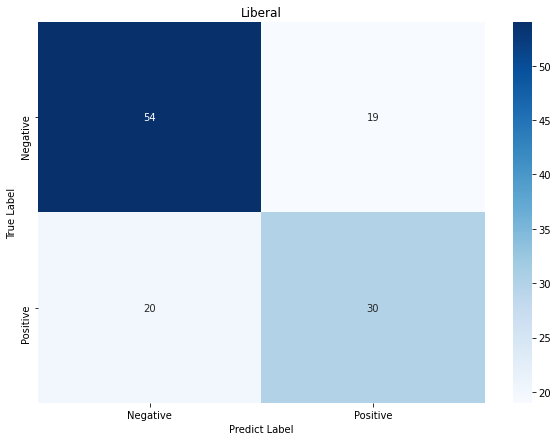

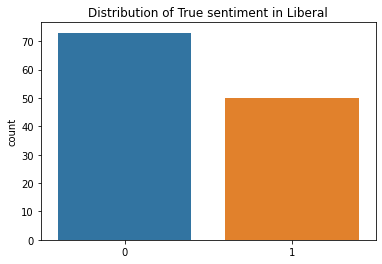

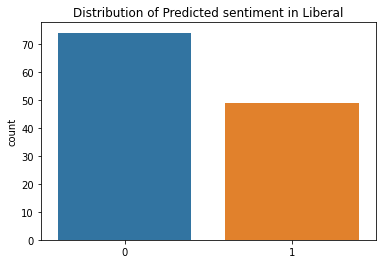

In [73]:
# Dataframe only contains Liberal party and use the model with the best performance to test it.
ce_L = df_ce.loc[df_ce["Liberal"]==1]
x_ce_L = ce_L.iloc[:, 2].values
y_ce_L = ce_L.iloc[:, 3].values
vectorizer4 = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None)
x_ce_L_TFIDF = vectorizer4.fit_transform(x_ce_L)
x_ce_L_TFIDF_tra, x_ce_L_TFIDF_test, y_ce_L_TFIDF_tra, y_ce_L_TFIDF_test = train_test_split(x_ce_L_TFIDF, y_ce_L, test_size = 0.3, random_state=42)
C = 0.01
solver = 'saga'
lr = LogisticRegression(max_iter=5000, C=C, solver=solver)
clf = lr.fit(x_ce_L_TFIDF_tra, y_ce_L_TFIDF_tra)
y_pred = clf.predict(x_ce_L_TFIDF_test)
print ("Logistic regression model's accuracy on test set of Liberal Party with optimal hyperparameters is: {}%".format(round(100 * np.mean(y_pred == y_ce_L_TFIDF_test),3)))
# confusion matrix
cm = confusion_matrix(y_ce_L_TFIDF_test,y_pred)
df_cm = pd.DataFrame(cm, index = ["Negative", "Positive"],
                  columns = ["Negative", "Positive"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.title("Liberal")
plt.show()
sns.countplot(y_ce_L_TFIDF_test)
plt.title("Distribution of True sentiment in Liberal")
plt.show()
sns.countplot(y_pred)
plt.title("Distribution of Predicted sentiment in Liberal")
plt.show()

Logistic regression model's accuracy on test set of Conservative Party with optimal hyperparameters is: 69.427%


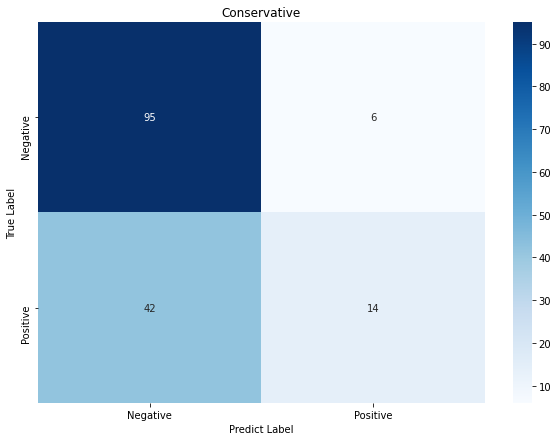

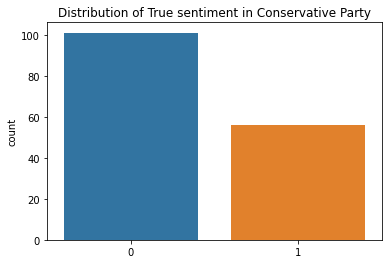

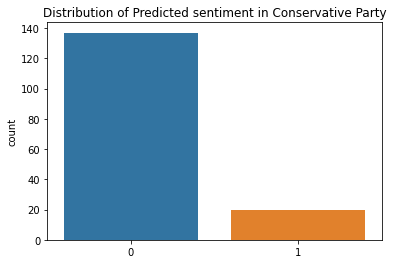

In [74]:
# Dataframe only contains Conservative party and use the model with the best performance to test it.
ce_C = df_ce.loc[df_ce["Conservative"]==1]
x_ce_C = ce_C.iloc[:, 2].values
y_ce_C = ce_C.iloc[:, 3].values
vectorizer4 = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None)
x_ce_C_TFIDF = vectorizer4.fit_transform(x_ce_C)
x_ce_C_TFIDF_tra, x_ce_C_TFIDF_test, y_ce_C_TFIDF_tra, y_ce_C_TFIDF_test = train_test_split(x_ce_C_TFIDF, y_ce_C, test_size = 0.3, random_state=42)
C = 0.01
solver = 'saga'
lr = LogisticRegression(max_iter=5000, C=C, solver=solver)
clf = lr.fit(x_ce_C_TFIDF_tra, y_ce_C_TFIDF_tra)
y_pred = clf.predict(x_ce_C_TFIDF_test)
print ("Logistic regression model's accuracy on test set of Conservative Party with optimal hyperparameters is: {}%".format(round(100 * np.mean(y_pred == y_ce_C_TFIDF_test),3)))
# confusion matrix
cm = confusion_matrix(y_ce_C_TFIDF_test,y_pred)
df_cm = pd.DataFrame(cm, index = ["Negative", "Positive"],
                  columns = ["Negative", "Positive"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.title("Conservative")
plt.show()
sns.countplot(y_ce_C_TFIDF_test)
plt.title("Distribution of True sentiment in Conservative Party")
plt.show()
sns.countplot(y_pred)
plt.title("Distribution of Predicted sentiment in Conservative Party")
plt.show()

Logistic regression model's accuracy on test set of NDP with optimal hyperparameters is: 72.0%


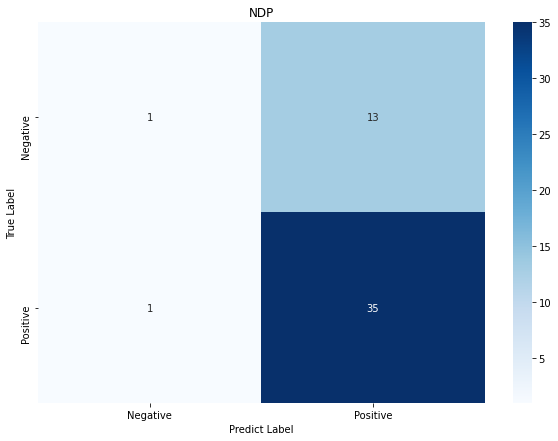

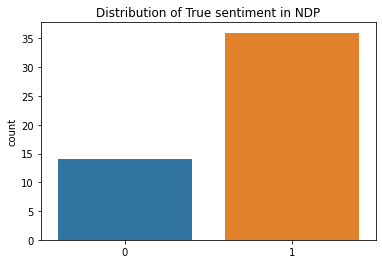

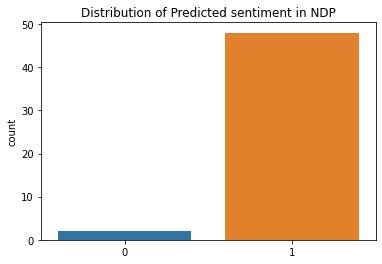

In [75]:
# Dataframe only contains NDP and use the model with the best performance to test it.
ce_NDP = df_ce.loc[df_ce["NDP"]==1]
x_ce_NDP = ce_NDP.iloc[:, 2].values
y_ce_NDP = ce_NDP.iloc[:, 3].values
vectorizer4 = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None)
x_ce_NDP_TFIDF = vectorizer4.fit_transform(x_ce_NDP)
x_ce_NDP_TFIDF_tra, x_ce_NDP_TFIDF_test, y_ce_NDP_TFIDF_tra, y_ce_NDP_TFIDF_test = train_test_split(x_ce_NDP_TFIDF, y_ce_NDP, test_size = 0.3, random_state=42)
C = 0.01
solver = 'saga'
lr = LogisticRegression(max_iter=5000, C=C, solver=solver)
clf = lr.fit(x_ce_NDP_TFIDF_tra, y_ce_NDP_TFIDF_tra)
y_pred = clf.predict(x_ce_NDP_TFIDF_test)
print ("Logistic regression model's accuracy on test set of NDP with optimal hyperparameters is: {}%".format(round(100 * np.mean(y_pred == y_ce_NDP_TFIDF_test),3)))
# confusion matrix
cm = confusion_matrix(y_ce_NDP_TFIDF_test,y_pred)
df_cm = pd.DataFrame(cm, index = ["Negative", "Positive"],
                  columns = ["Negative", "Positive"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.title("NDP")
plt.show()
sns.countplot(y_ce_NDP_TFIDF_test)
plt.title("Distribution of True sentiment in NDP")
plt.show()
sns.countplot(y_pred)
plt.title("Distribution of Predicted sentiment in NDP")
plt.show()

###### **As we can see is that, Liberal party has the much higher rate of positive sentiment(almost 50%) than Conservative Party(almost 1/3). NDP has more than 50% of postive sentiment, but the quantity is less than Liberal and Conservative Party. We know that Liberal Party win the election last year, which is match to the True sentiment of 3 Parties.**
###### **Best model(logistic regression) achieves about 70% of each of 3 parties, which is a acceptable accuracy. and based on countplot, total number of positive sentiment and negative sentiment in True label are quite match to the predicted positive sentiment and negative snetiment.Therefore, NLP analytics based on tweets is useful for political parties during election campaigns.**

#### **Implement model for negative reason.**

In [76]:
df_ce_nr = df_ce.loc[df_ce["sentiment"]=='Negative']
df_ce_nr

,sentiment,negative_reason,text,sentiment_value,text_length,Conservative,Liberal,NDP,None
0,Negative,Women Reproductive right and Racism,rosiebarton so instead of your suggestion how ...,0,266,1,0,0,0
2,Negative,Economy,brantford its going to cost you 94 billion for...,0,96,0,1,0,0
4,Negative,Economy,canada taxpayers are sick tired of having thei...,0,259,0,1,0,0
5,Negative,Others,canadavotes2019 elxn43 cdnpoli facts blastfrom...,0,237,1,0,0,0
8,Negative,Others,chooseforward cdnpoli elxn43ncanada dont make ...,0,95,0,0,0,1
...,...,...,...,...,...,...,...,...,...
2125,Negative,Others,you canxe2x80x99t be a supervillain of an elec...,0,90,0,0,0,1
2126,Negative,Climate Problem,you care about limiting climatechange and are ...,0,247,0,0,0,1
2128,Negative,Scandal,you know he was doing a good enough job smeari...,0,205,1,0,0,0
2129,Negative,Scandal,you missed the comment deflecting the issue do...,0,244,0,0,0,1


In [77]:
x_ce_nr = df_ce_nr.iloc[:, 2]
y_ce_nr = df_ce_nr.iloc[:, 1]
vectorizer4 = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None)
x_ce_nr_TFIDF = vectorizer4.fit_transform(x_ce_nr)
x_ce_nr_TFIDF_tra, x_ce_nr_TFIDF_test, y_ce_nr_TFIDF_tra, y_ce_nr_TFIDF_test = train_test_split(x_ce_nr_TFIDF, y_ce_nr, test_size = 0.3, random_state=42)
lr = LogisticRegression(max_iter=5000)
clf = lr.fit(x_ce_nr_TFIDF_tra, y_ce_nr_TFIDF_tra)
y_pred = clf.predict(x_ce_nr_TFIDF_test)
print ("Logistic regression model's accuracy on test set of negative reason with optimal hyperparameters is: {}%".format(round(100 * np.mean(y_pred == y_ce_nr_TFIDF_test),3)))

Logistic regression model's accuracy on test set of negative reason with optimal hyperparameters is: 52.318%


In [78]:
rf = RandomForestClassifier()
clf = rf.fit(x_ce_nr_TFIDF_tra, y_ce_nr_TFIDF_tra)
y_pred = clf.predict(x_ce_nr_TFIDF_test)
print ("Random Forest model's accuracy on negative reason with optimal hyperparameters is: {}%".format(round(100 * np.mean(y_pred == y_ce_nr_TFIDF_test),3)))

Random Forest model's accuracy on negative reason with optimal hyperparameters is: 51.987%


In [79]:
svm = SVC()
clf = svm.fit(x_ce_nr_TFIDF_tra, y_ce_nr_TFIDF_tra)
y_pred = clf.predict(x_ce_nr_TFIDF_test)
print ("SVM model's accuracy on negative reason with optimal hyperparameters is: {}%".format(round(100 * np.mean(y_pred == y_ce_nr_TFIDF_test),3)))

SVM model's accuracy on negative reason with optimal hyperparameters is: 44.702%


##**5.Results**
####**5.1:Answer the research question stated above based on the outputs of your first model. Describe the results of the analysis and discuss your interpretation of the results. Explain how each party is viewed in the public eye based on the sentiment value**
######**Liberal party has the much higher rate of positive sentiment(almost 50%) than Conservative Party(almost 1/3). NDP has more than 50% of postive sentiment, but the quantity is less than Liberal and Conservative Party. We know that Liberal Party win the election last year, which is match to the True sentiment of 3 Parties. Best model(logistic regression) achieves about 70% of each of 3 parties, which is a acceptable accuracy. and based on countplot, total number of positive sentiment and negative sentiment in True label are quite match to the predicted positive sentiment and negative snetiment.**
####**5.2:For the second model, based on the model that worked best, provide a few reasons why your model may fail to predict the correct negative reasons.**
######**Logistic regression works best with about 52% accuracy. Since this is a multiclass model(10 classes), it would be much harder to have to same accuracy as binary class model. Another reason is what we can see below: number of Healthcare & Healthcare and Marijuana is only 5 and 4. It might be the case that training data does not have enought data about those 2 label, and this will result in lower accuracy in prediction of those 2 labels.**

######**count the number of each negative reason.**

In [80]:
df_ce_nr["negative_reason"].value_counts()

Others                                 364
Scandal                                270
Tell lies                              198
Economy                                 51
Women Reproductive right and Racism     45
Climate Problem                         41
Separation                              16
Privilege                               12
Healthcare                               5
Healthcare and Marijuana                 4
Name: negative_reason, dtype: int64

####**Improvement:**
######**1.For the first model, before removing stop word, we can check whether "not" and some adjective like "good" are consecutive. If it is , we should not remove "not", "not good" will be classified as positive sentiment, which is not reasonable.**
######**2.For the second model, We could combine similar reasons to be one reason and some reason with low quantity can be combined with label Others.**

## **Bonus**

In [83]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=5000)
scores = cross_val_score(mlp, x_s_TFIDF_tra, y_s_TFIDF_tra, cv=5, scoring='accuracy') # 5 fold cross validation of MLP model
print(scores.mean())

0.6864285714285714


In [84]:
# Hyperparameters Tunning of MLP model to find out the best hyperparameters corresponding to the best accuracy.
alpha = [0.001, 0.005, 0.01, 0.05, 0.1, 1, 10]
solver = ['lbfgs', 'sgd', 'adam']
learning_rate = ['constant','adaptive','invscaling']
param_grid = dict(alpha=alpha,
                  solver=solver,
                  learning_rate=learning_rate)
grid = GridSearchCV(estimator=mlp,
                    param_grid=param_grid,
                    scoring='accuracy',
                    verbose=0,
                    n_jobs=-1,
                    cv=5)
grid_result = grid.fit(x_s_TFIDF_tra, y_s_TFIDF_tra)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best Score:  0.7307142857142858
Best Params:  {'alpha': 10, 'learning_rate': 'adaptive', 'solver': 'adam'}


In [87]:
# Using the best hyperparameters to predict test data.
alpha = 10
learning_rate = 'adaptive'
solver = 'adam'
mlp = MLPClassifier(max_iter=5000, alpha=alpha, learning_rate=learning_rate, solver=solver)
clf_mlp = mlp.fit(x_s_TFIDF_tra, y_s_TFIDF_tra)
y_pred = clf_mlp.predict(x_s_TFIDF_test)
print ("MLP model's accuracy on test set with optimal hyperparameters is: {}%".format(round(100 * np.mean(y_pred == y_s_TFIDF_test),3)))

MLP model's accuracy on test set with optimal hyperparameters is: 73.067%


###### **MLP achieves better performmance than previous best model!**

######**display the results of the model visually.**

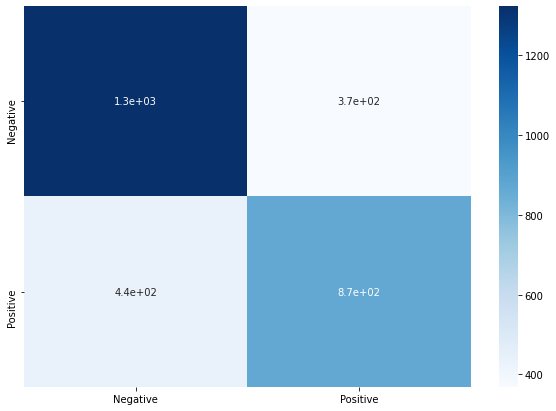

In [90]:
cm = confusion_matrix(y_s_TFIDF_test,y_pred)
df_cm = pd.DataFrame(cm, index = ["Negative", "Positive"],
                  columns = ["Negative", "Positive"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap='Blues')

######**This is the visualization of confusion matrix, which including the how many true sentiment was correctly and incorrectly predicted for both positive and negative sentiment.**